# starter code
```
use it to help you load an image from the internet
it is not required to understand it to complete the task however it is a good practice to read it.
```

> Don't forget to run this cell in order to load the image --> img

In [37]:
img_url = "https://i.pinimg.com/originals/60/74/aa/6074aa58b290f75fe8a7bf82c548676d.jpg"
respanse = requests.get(img_url)
raw_img = BytesIO(response.content) # extracting the image as bytes from the response buffer
print(raw_img)

<class '_io.BytesIO'>
(1600, 2400, 3)


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

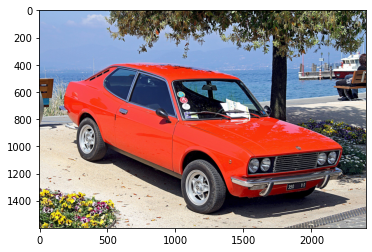

In [38]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO 

img_url = "https://i.pinimg.com/originals/60/74/aa/6074aa58b290f75fe8a7bf82c548676d.jpg"
response = requests.get(img_url)    # using get request to download the image into buffer

raw_img = BytesIO(response.content) # extracting the image as bytes from the response buffer
print(type(raw_img))

# converting the image into PIL.Image object then casting it into numpy.ndarray
# used the copy to deep copy the image array since the image source isn't writable
src_img = np.uint8(Image.open(raw_img)).copy()      
print(src_img.shape)

# displaying the image
plt.imshow(src_img)

# printing the array state to ensure it is writable
src_img.flags   # you can comment the copy() and test the output flags

# Homework

## task
- given the image your are asked to split it into the three color channels $\{R, G, B\}$
- then plot each in a seperate cell


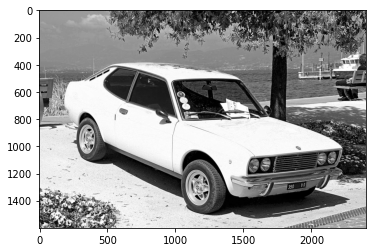
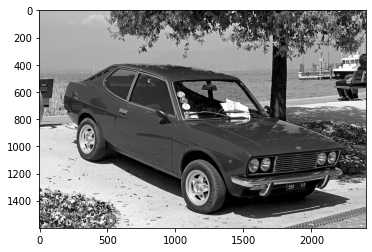
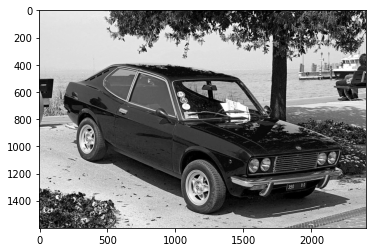

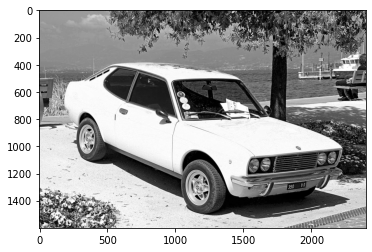

In [39]:
######################
# enter your code here
######################

r_channel = src_img[:,:,0]
plt.imshow(r_channel, cmap='gray');

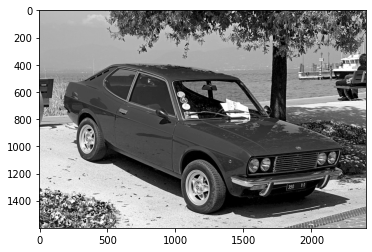

In [40]:
######################
# enter your code here
######################

g_channel = src_img[:,:,1]
plt.imshow(g_channel, cmap='gray');

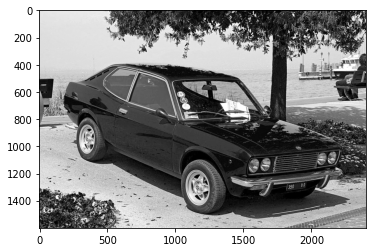

In [41]:
######################
# enter your code here
######################

b_channel = src_img[:,:,2]
plt.imshow(b_channel, cmap='gray');

- then given a rectangular box [75, 375, 2250, 1450] cut a patch area in the green channel with that box area, where x1, y1 indices of the first corner of the box (75, 375).

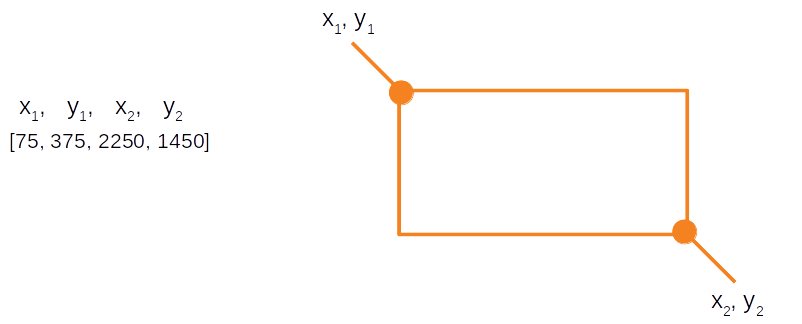

- so the green channel would be like so if you plot it:

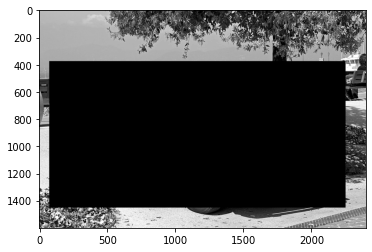


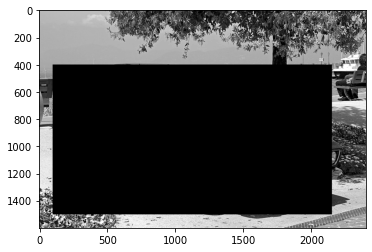

In [42]:
######################
# enter your code here
######################
g_channel = src_img[:,:,1]

x1, y1, x2, y2 = 400, 100, 1500, 2150
g_channel[x1:x2, y1:y2] = 0
plt.imshow(g_channel, cmap='gray');


- finally stack the three channels back and plot the image it should look like so:

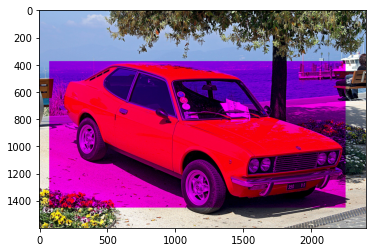

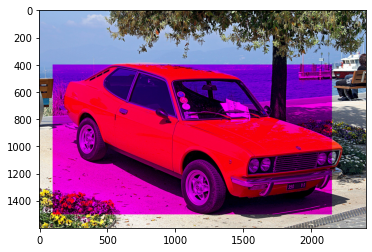

In [43]:
######################
# enter your code here
######################

back_img = np.dstack([r_channel, g_channel, b_channel])
plt.imshow(back_img);


# pro-task | bonus
Not mandatory unless you feel confident with the homework and want to shine a skill.


- using the source image from the internet split it into color channels
- select the channel that can segment the car which have the highest color value as same as the car
- create a binary mask that selects the pixels only that fall into the car based on color value `channel > threshold`

> don't panic it is 2 lines code


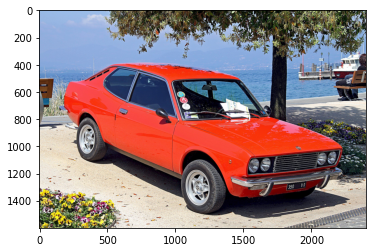

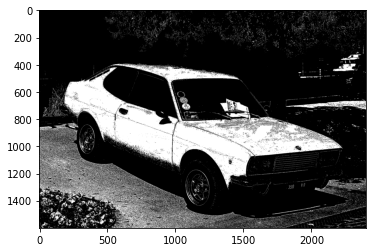

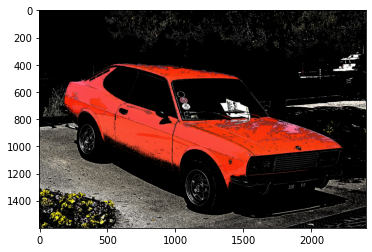



Expected output

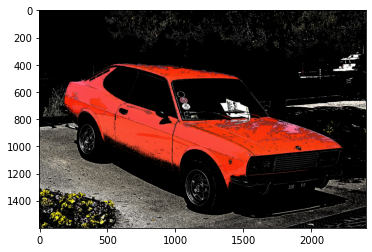


- you can use this plot to decide the threshold value you will block other colors with except the car color depending on that histogram plot of the color channel that has the same color as the car

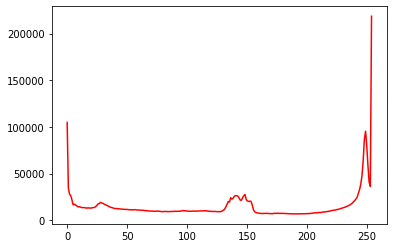

x-axis is the pixels values of the color channel from 0-255   
y-axis is the number of pixels that have this values in the channel   

\

this shows that near the 255 value of the channel there where your object lies
and before it is the don't care pixels you have to block make your choice between [230:250]

if you are asking how to generate that histogram plot using [`np.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

```python3

>>>    pixels_hist, pixels_bins = np.histogram(channel_arr, bins=256, range=(0, 255))
>>>    plt.plot(pixels_bins[:-1], pixels_hist)

```

In [44]:
# >>>>>>>>>>>>> hint <<<<<<<<<<<<<<<
# ------- filter using masks -------
# >>>>>>>>>>>>> hint <<<<<<<<<<<<<<<

x = np.random.random(15)    # generating some random values
print("x >> ", x)
print("\n")
print("mask", x > 0.3)      # create mask array pointing to all values lower than 0.3
print("\n")

# filtering the array using the mask as indices
print("filtred", x[x > 0.3]) 


x >>  [0.77228244 0.94483684 0.01037018 0.69517976 0.21551664 0.09554281
 0.67380299 0.85712845 0.5929375  0.12918857 0.10303217 0.25318627
 0.97724375 0.69010187 0.66804415]


mask [ True  True False  True False False  True  True  True False False False
  True  True  True]


filtred [0.77228244 0.94483684 0.69517976 0.67380299 0.85712845 0.5929375
 0.97724375 0.69010187 0.66804415]


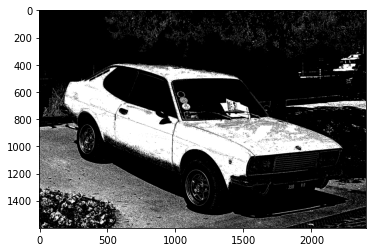

In [52]:
######################
# enter your code here
######################

r_channel = src_img[:,:,0]
masked_rchannel = r_channel > 240
plt.imshow(masked_rchannel, cmap='gray');
